## 遺伝的アルゴリズム
### この関数作って
#### 初期値生成
#### 評価
#### 選択
#### 突然変異

とその前に。。。。
## リアルタイム可視化の方法

[このサイトのコードを引用](https://www.sejuku.net/blog/61007)

どうやら %matplotlib notebook と　%matplotlib inline  この二つは実行環境によって動作が異なるらしい。<br>

## %matplotlib inlineの場合
○：JupyterLab<br>
○：Jupyter Notebook

## %matplotlib notebookの場合
×：JupyterLab（→「Javascript Error: IPython is not defined」と表示される。）<br>
○：Jupyter Notebook

引用
[【備忘録】JupyterLabとJupyter Notebookにおける%matplotlib inlineと%matplotlib notebookの挙動の違い（Javascript Error: IPython is not defined）](https://tropicbird.hatenablog.com/entry/2019/08/28/110119)

そういえばjupyterlabとjupyter notebookについてあんま調べなかったからついでに
jupyterlabはjupyter notebookの進化系みたいなやつで、notebookの方は一画面表示しかできなかったのに対し、複数の画面を表示できるようにしたのがlabっていう感じかな？<br>
調べている途中に面白そうなツールなどを発見したのでインストール<br>
Node.jsのインストールが必要だったのでついでにインストール<br>
[参考資料](https://qiita.com/kyosuke5_20/items/c5f68fc9d89b84c0df09)<br>
[役立つやつ](https://qiita.com/kirikei/items/a1639954ce5ccaf7ac3c)<br>

ということで本題に...
ちなみに、サイトのやつそのままだとどうやらうまくいかないようで、調べたらそのままコピペした人のteratailの質問があったので、その回答のコードを参考（丸写し）しました。<br>
[python におけるアニメーション](https://teratail.com/questions/223929)

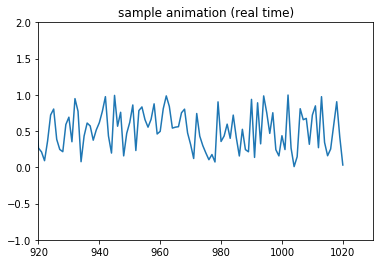

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import random
from IPython.display import HTML
fig = plt.figure()
xlim = [0, 110]
X, Y = [], []
def plot(data):
    plt.cla()  # 前のグラフを削除
    for i in range(10):
        Y.append(random.random())  # データを作成
        X.append(len(Y))
        # # 描画範囲を更新
        if len(X) > 100: 
            xlim[0] += 1
            xlim[1] += 1
    plt.plot(X, Y)  # 次のグラフを作成
    plt.title("sample animation (real time)")
    plt.ylim(-1, 2)
    plt.xlim(xlim[0], xlim[1])
# 10msごとにplot関数を呼び出してアニメーションを作成
ani = animation.FuncAnimation(fig, plot, interval=100,)
HTML(ani.to_jshtml())

完了。ということで早速関数作り

# 初期値生成

In [4]:
import numpy as np

def create_citys(num_of_citys):
    citys = np.zeros((num_of_citys, 2))
    for x in range(num_of_citys):
        citys[x,0] = random.random()
        citys[x,1] = random.random()
    return citys



In [5]:
citys_info=create_citys(10)

In [6]:
citys_info.shape

(10, 2)

# 初期遺伝子情報作成

In [7]:

def create_gene(data, num_of_gene):
    gene = np.zeros((num_of_gene,data.shape[0]))
    gene_sample = np.zeros((data.shape[0]))
    for x in range(data.shape[0]):
        gene_sample[x] = x
    for y in range(gene.shape[0]):
        random.seed(y)
        gene[y] = np.random.permutation(gene_sample)
    return gene

In [8]:
gene = create_gene(citys_info, 15)

# 評価

In [9]:

def culc_dist(city_info, gene):
    dist = np.zeros(gene.shape[0])
    for x in range(gene.shape[0]):
        dist_contain = 0
        for y in range(gene.shape[1]-1):
            dist_contain += np.linalg.norm(city_info[int(gene[x, y])] - city_info[int(gene[x, y+1])])
        dist[x] = dist_contain
    return dist

In [14]:
dist_list = culc_dist(citys_info, gene)
dist_list

array([4.98555885, 3.97997853, 3.97828549, 4.50856422, 3.32561856,
       4.39029022, 4.7155055 , 4.37091145, 4.46191517, 3.52765537,
       4.76180068, 4.25367161, 4.47920515, 3.91992891, 3.04118468])

# 選択　エリート、ルーレット

In [19]:

def create_plob(dist_list):
    re_dist_list = 1/dist_list
    sum = np.sum(re_dist_list)
    plob = np.zeros(len(dist_list.shape))
    plob = re_dist_list/sum
    return plob

def choice(dist_list):
    roulette = create_plob(dist_list)
    choiced = np.random.choice(len(roulette), 2,replace = True, p = roulette)
    return choiced


In [20]:
choice(dist_list)

array([ 9, 11])

In [21]:
dist_list

array([4.98555885, 3.97997853, 3.97828549, 4.50856422, 3.32561856,
       4.39029022, 4.7155055 , 4.37091145, 4.46191517, 3.52765537,
       4.76180068, 4.25367161, 4.47920515, 3.91992891, 3.04118468])